# Dados, EDA e limpeza

In [1]:
import os
from pathlib import Path

In [2]:
atualPath = Path.cwd()

ColabNotebooks = atualPath / 'drive' / 'MyDrive' / 'Colab Notebooks'
# os.listdir(ColabNotebooks)

fullPath = str(ColabNotebooks / 'Memorias Postumas de Bras Cubas.txt')
fullPath

'/content/drive/MyDrive/Colab Notebooks/Memorias Postumas de Bras Cubas.txt'

In [ ]:
# read a txt file
with open(fullPath, 'r', encoding='latin-1') as f:
    text = f.read()


In [ ]:
import unicodedata

text_sample = unicodedata.normalize('NFC', text)
text_sample

"Memórias Póstumas de Brás Cubas\nTexto-fonte:\nObra Completa, Machado de Assis,\nRio de Janeiro: Editora Nova Aguilar, 1994.\nPublicado originalmente em folhetins, a partir de março de 1880, na Revista Brasileira.\nAo verme\nque\nprimeiro roeu as frias carnes\ndo meu cadáver\ndedico\ncomo saudosa lembrança\nestas\nMemórias Póstumas\nPrólogo da terceira edição\nA primeira edição destas Memórias Póstumas de Brás Cubas foi feita\naos pedaços na Revista Brasileira, pelos anos de 1880. Postas mais\ntarde em livro, corrigi o texto em vários lugares. Agora que tive de o\nrever para a terceira edição, emendei ainda alguma coisa e suprimi\nduas ou três dúzias de linhas. Assim composta, sai novamente à luz\nesta obra que alguma benevolência parece ter encontrado no público.\nCapistrano de Abreu, noticiando a publicação do livro, perguntava:\n\x93As Memórias Póstumas de Brás Cubas são um romance?\x94 Macedo\nSoares, em carta que me escreveu por esse tempo, recordava\namigamente as Viagens na min

In [ ]:
# Exemplo de caracteres estranhos

idxs = text.index('\x93')

text[idxs-10:idxs+10]

'rguntava:\n\x93As Memóri'

In [ ]:
# fixing \n, \94 (weird characters) of the file
text = text_sample[:]
del text_sample # deleting useless text

exclude = ['\x90', '\x91', '\x92', '\x93', '\x94', '\x95', '\x96', '\x97', '\x98', '\x99']
for char in exclude:
  if char in text:
    text = text.replace(char, '')

# excluding double space
text = text.replace('ü', 'u').replace('  ', ' ').replace(' / ', ' ')
text

"Memórias Póstumas de Brás Cubas\nTexto-fonte:\nObra Completa, Machado de Assis,\nRio de Janeiro: Editora Nova Aguilar, 1994.\nPublicado originalmente em folhetins, a partir de março de 1880, na Revista Brasileira.\nAo verme\nque\nprimeiro roeu as frias carnes\ndo meu cadáver\ndedico\ncomo saudosa lembrança\nestas\nMemórias Póstumas\nPrólogo da terceira edição\nA primeira edição destas Memórias Póstumas de Brás Cubas foi feita\naos pedaços na Revista Brasileira, pelos anos de 1880. Postas mais\ntarde em livro, corrigi o texto em vários lugares. Agora que tive de o\nrever para a terceira edição, emendei ainda alguma coisa e suprimi\nduas ou três dúzias de linhas. Assim composta, sai novamente à luz\nesta obra que alguma benevolência parece ter encontrado no público.\nCapistrano de Abreu, noticiando a publicação do livro, perguntava:\nAs Memórias Póstumas de Brás Cubas são um romance? Macedo\nSoares, em carta que me escreveu por esse tempo, recordava\namigamente as Viagens na minha terra

In [ ]:
import re

text = re.sub(r'\.{6,}', '...', text)
text = re.sub(r'.*CAPÍTULO PRIMEIRO ÓBITO DO AUTOR', 'CAPÍTULO PRIMEIRO ÓBITO DO AUTOR', text, flags=re.DOTALL)

In [ ]:
text = re.sub(r'(\.\.\.\s?)+', '...', text)

Salvando o dataset para treinamento

In [ ]:
# export text to 'brascubas_treated.txt
fileName = 'brascubas_treated.txt'
wholePath = str(ColabNotebooks / fileName)

with open(wholePath, 'w', encoding='utf-8') as f:
  f.write(text)

In [4]:
with open(wholePath, 'r', encoding='utf-8') as f:
  text = f.read()

In [5]:
text

"CAPÍTULO PRIMEIRO ÓBITO DO AUTOR\nAlgum tempo hesitei se devia abrir estas memórias pelo princípio ou\npelo fim, isto é, se poria em primeiro lugar o meu nascimento ou a\nminha morte. Suposto o uso vulgar seja começar pelo nascimento,\nduas considerações me levaram a adotar diferente método: a\nprimeira é que eu não sou propriamente um autor defunto, mas um\ndefunto autor, para quem a campa foi outro berço; a segunda é que\no escrito ficaria assim mais galante e mais novo. Moisés, que também\ncontou a sua morte, não a pôs no intróito, mas no cabo: diferença\nradical entre este livro e o Pentateuco.\nDito isto, expirei às duas horas da tarde de uma sexta-feira do mês\nde agosto de 1869, na minha bela chácara de Catumbi. Tinha uns\nsessenta e quatro anos, rijos e prósperos, era solteiro, possuía cerca\nde trezentos contos e fui acompanhado ao cemitério por onze\namigos. Onze amigos! Verdade é que não houve cartas nem\nanúncios. Acresce que chovia peneirava uma chuvinha miúda,\ntriste e 

# Libs para ML

In [6]:
!pip install datasets transformers torch peft huggingface_hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [7]:
from transformers import AutoTokenizer, AutoModelForCausalLM, TrainingArguments, Trainer
import torch

In [8]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [9]:
model_name = 'pierreguillou/gpt2-small-portuguese'

tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token # configurar o tokenizador EOS

model = AutoModelForCausalLM.from_pretrained(model_name).to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/92.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/850k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/508k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/510M [00:00<?, ?B/s]

In [10]:
max_length = 512

input_ids = tokenizer(text,
                      return_overflowing_tokens=True,
                      add_special_tokens=True,
                      max_length=max_length,
                      padding='max_length',
                      truncation=True,
                      return_tensors='pt')
input_ids

{'input_ids': tensor([[32718, 15707,    52,  ..., 46334,    12, 12008],
        [  297,   275,   527,  ...,  4485,  1599,    13],
        [   79,   358,  1022,  ...,   443,   300,  5192],
        ...,
        [ 3856, 10001,   261,  ...,    12,   391, 12139],
        [  475,  2825,   261,  ...,   307,   337,  1572],
        [24534,    12,   275,  ...,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'overflow_to_sample_mapping': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [11]:
input_ids['input_ids'].shape

torch.Size([189, 512])

In [12]:
from datasets import DatasetDict, Dataset

data_dict = {'input_ids': input_ids['input_ids'], 'attention_mask': input_ids['attention_mask'], 'labels': input_ids['input_ids']}

In [13]:
from sklearn.model_selection import train_test_split

train_data, val_data = train_test_split(data_dict['input_ids'], test_size=0.2, random_state=42 )
val_data, test_data = train_test_split(val_data, test_size=0.2, random_state=42 )

train_mask, val_mask = train_test_split(data_dict['attention_mask'], test_size=0.2, random_state=42 )
val_mask, test_mask = train_test_split(val_mask, test_size=0.2, random_state=42 )

train_labels, val_labels = train_test_split(data_dict['labels'], test_size=0.2, random_state=42 )
val_labels, test_labels = train_test_split(val_labels, test_size=0.2, random_state=42 )

train_dataset = Dataset.from_dict({'input_ids': train_data, 'attention_mask': train_mask, 'labels': train_labels})
val_dataset = Dataset.from_dict({'input_ids': val_data, 'attention_mask': val_mask, 'labels': val_labels})
test_dataset = Dataset.from_dict({'input_ids': val_data, 'attention_mask': val_mask, 'labels': val_labels})

datasets = DatasetDict({'train': train_dataset, 'validation': val_dataset})
test_datasets = DatasetDict({'test': test_dataset})

In [14]:
datasets

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 151
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 30
    })
})

In [15]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: write).
The token `SMALL PORTUGUESE` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `SMALL P

## Treinamento com 3 épocas

In [16]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="./results",         # Pasta para salvar checkpoints
    eval_strategy="epoch",    # Avaliação por época
    save_strategy="epoch",          # Salvar modelo por época
    logging_dir="./logs",           # Diretório para logs
    per_device_train_batch_size=4,  #
    per_device_eval_batch_size=4,
    num_train_epochs=3,             # Número de épocas AUMENTAR NUMERO DE EPOCAS PARA MELHORAR O MODELO
    weight_decay=0.01,              # Regularização
    save_total_limit=2,             # Limita o número de checkpoints
    fp16=True,                      # Usa precisão mista se possível      PARA FAZER O DEPLOY NO HUGGING FACE, INSTANCIA API KEY E TOKEN
    push_to_hub=True,              # Se quiser salvar no Hugging Face Hub
    report_to='none',
    logging_strategy="steps",      # Log a cada "steps"
    logging_steps=10,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=datasets["train"],
    eval_dataset=datasets["validation"],
)


In [17]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,4.457500,4.259496
2,4.237700,4.196606
3,4.158000,4.183916


TrainOutput(global_step=114, training_loss=4.309782680712249, metrics={'train_runtime': 107.0705, 'train_samples_per_second': 4.231, 'train_steps_per_second': 1.065, 'total_flos': 118365290496000.0, 'train_loss': 4.309782680712249, 'epoch': 3.0})

In [18]:
input_ids = torch.tensor([test_datasets['test']['input_ids'][0]]).to(device)  #  formato tensor
attention_mask = torch.tensor([test_datasets['test']['attention_mask'][0]]).to(device)

#  inferência
output = model.generate(input_ids, attention_mask=attention_mask)

# Decodificar a saída do modelo
output_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(output_text)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


 casa roxa,
situada a duzentos passos da nossa.
 Quem?
 Nhonhô talvez não se lembre mais de D. Eusébia... Lembra-me...É ela?
 Ela e a filha. Vieram ontem de manhã.
Ocorreu-me logo o episódio de 1814, e senti-me vexado; mas adverti
que os acontecimentos tinham-me dado razão. Na verdade, fora
impossível evitar as relações íntimas do Vilaça com a irmã do
sargento-mor; antes mesmo do meu embarque, já se boquejava
misteriosamente no nascimento de uma menina. Meu tio João
mandou-me dizer depois que o Vilaça, ao morrer, deixara um bom
legado a D. Eusébia, coisa que deu muito que falar em todo o bairro.
O próprio tio João, guloso de escândalos, não tratou de outro assunto
na carta, aliás de muitas folhas. Tinham-me dado razão os
acontecimentos. Ainda porém que ma não dessem, 1814 lá ia longe,
e, com ele, a travessura, e o Vilaça, e o beijo da moita; finalmente,
nenhumas relações estreitas existiam entre mim e ela. Fiz comigo
essa reflexão e acabei de fechar o baú.
 Nhonhô não vai visitar sinhá

## Avaliação do modelo

In [19]:
!pip install rouge evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.9 MB/s eta 0:00:00


In [25]:
from rouge import Rouge
import evaluate
def calcular_scores(output_text, reference_text):
    """
    Calcula e retorna os scores ROUGE e BLEU.

    Args:
    output_text (str): Texto gerado pelo modelo.
    reference_text (str): Texto de referência.

    Returns:
    tuple: Contendo os scores ROUGE e BLEU.
    """

    # Calcular a precisão ROUGE
    rouge = Rouge()
    scores = rouge.get_scores(output_text, reference_text)
    rouge_score = scores[0]['rouge-l']['f']

    # Calcular a precisão BLEU
    bleu = evaluate.load("bleu")
    results = bleu.compute(predictions=[output_text], references=[reference_text])
    bleu_score = results['bleu']
    return rouge_score, bleu_score

In [26]:
reference_text = test_datasets['test']['labels'][0]
reference_text = tokenizer.decode(reference_text, skip_special_tokens=True)

rouge_score, bleu_score = calcular_scores(output_text, reference_text)

print(f"Score ROUGE: {rouge_score}")
print(f"Score BLEU: {bleu_score}")

Score ROUGE: 0.9906103236386079
Score BLEU: 0.9575029369869892


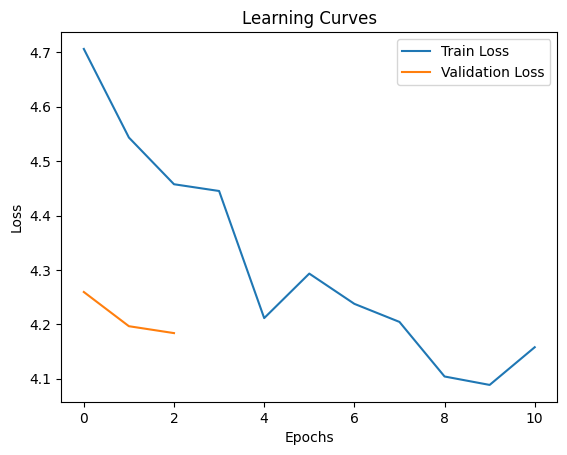

In [27]:
import matplotlib.pyplot as plt

def plotar_curvas_de_aprendizado(trainer):
    """
    Plota as curvas de aprendizado para o treinamento e validação.

    Args:
    trainer: O objeto trainer do Hugging Face.
    """

    train_losses = trainer.state.log_history
    train_loss = [log["loss"] for log in train_losses if "loss" in log]
    eval_losses = [log["eval_loss"] for log in train_losses if "eval_loss" in log]

    plt.plot(train_loss, label='Train Loss')
    plt.plot(eval_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Learning Curves')
    plt.show()

plotar_curvas_de_aprendizado(trainer)

## Treinamento com 10 épocas

In [28]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_dir="./logs",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=10,
    weight_decay=0.01,
    save_total_limit=2,
    fp16=True,
    push_to_hub=True,
    report_to='none',
    logging_strategy="steps",
    logging_steps=10,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=datasets["train"],
    eval_dataset=datasets["validation"],
)


In [29]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,4.037300,4.159729
2,3.869100,4.137687
3,3.803700,4.132433
4,3.680400,4.133936
5,3.565800,4.141155
6,3.492200,4.147902
7,3.379000,4.153696
8,3.400200,4.162042
9,3.362300,4.165392
10,3.300100,4.167542


No files have been modified since last commit. Skipping to prevent empty commit.


TrainOutput(global_step=380, training_loss=3.5778385262740287, metrics={'train_runtime': 694.9223, 'train_samples_per_second': 2.173, 'train_steps_per_second': 0.547, 'total_flos': 394550968320000.0, 'train_loss': 3.5778385262740287, 'epoch': 10.0})

In [30]:
input_ids = torch.tensor([test_datasets['test']['input_ids'][0]]).to(device)  #  formato tensor
attention_mask = torch.tensor([test_datasets['test']['attention_mask'][0]]).to(device)

#  inferência
output = model.generate(input_ids, attention_mask=attention_mask)

# Decodificar a saída do modelo
output_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(output_text)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


 casa roxa,
situada a duzentos passos da nossa.
 Quem?
 Nhonhô talvez não se lembre mais de D. Eusébia... Lembra-me...É ela?
 Ela e a filha. Vieram ontem de manhã.
Ocorreu-me logo o episódio de 1814, e senti-me vexado; mas adverti
que os acontecimentos tinham-me dado razão. Na verdade, fora
impossível evitar as relações íntimas do Vilaça com a irmã do
sargento-mor; antes mesmo do meu embarque, já se boquejava
misteriosamente no nascimento de uma menina. Meu tio João
mandou-me dizer depois que o Vilaça, ao morrer, deixara um bom
legado a D. Eusébia, coisa que deu muito que falar em todo o bairro.
O próprio tio João, guloso de escândalos, não tratou de outro assunto
na carta, aliás de muitas folhas. Tinham-me dado razão os
acontecimentos. Ainda porém que ma não dessem, 1814 lá ia longe,
e, com ele, a travessura, e o Vilaça, e o beijo da moita; finalmente,
nenhumas relações estreitas existiam entre mim e ela. Fiz comigo
essa reflexão e acabei de fechar o baú.
 Nhonhô não vai visitar sinhá

In [31]:
reference_text = test_datasets['test']['labels'][0]
reference_text = tokenizer.decode(reference_text, skip_special_tokens=True)

rouge_score, bleu_score = calcular_scores(output_text, reference_text)

print(f"Score ROUGE: {rouge_score}")
print(f"Score BLEU: {bleu_score}")

Score ROUGE: 0.9836829786836628
Score BLEU: 0.9626164827724293


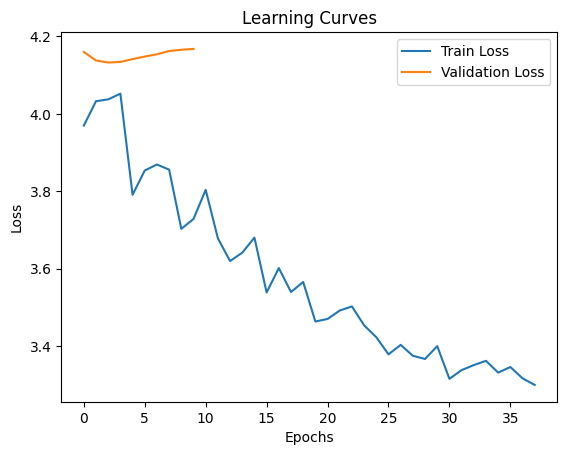

In [32]:
plotar_curvas_de_aprendizado(trainer)


In [33]:
from huggingface_hub import create_repo
create_repo("portuguese-machado-assis")
trainer.push_to_hub()


CommitInfo(commit_url='https://huggingface.co/eudesfilho/results/commit/1536ea1f2d99427d605e77b0556f8266a175370a', commit_message='End of training', commit_description='', oid='1536ea1f2d99427d605e77b0556f8266a175370a', pr_url=None, repo_url=RepoUrl('https://huggingface.co/eudesfilho/results', endpoint='https://huggingface.co', repo_type='model', repo_id='eudesfilho/results'), pr_revision=None, pr_num=None)